# Homework 2: Ordinary Differential Equations

### Bayu Wilson

#### Professor Tom Quinn
Due April 25



# (1) Write numerical ODE integrator 

Write a program to integrate up to **four** sets of coupled differential equations using the Euler method, fourth-order Runge-Kutta, and Leapfrog.

Euler Method is essentially lowest order.

$$ \frac{dy}{dt}=f(y_i,t_i) = \frac{y_{i+1}-y_i}{h}+O(h) $$

$$ y_{i+1}=y_i + h f(y_i,t_i)+O(h^2) $$

### Euler method
$$y_{n+1}=y_{n}+hf(t_{n},y_{n})$$

It should solve this kind of equation:

$$\frac{d^2x}{dt^2} + B \frac{dx}{dt} + Cx = D(t)$$

$$ y[0] = x $$
$$ y[1] = v $$
$$ dydt[0] = v $$
$$ dydt[1] = dv/dt $$

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import pandas as pd
def null_func(t,y): 
    # a placeholder function with two dependent variables. Used in Euler method if there is a more complicated ODE.
    return 0
def euler_method(f_t=null_func,A=-1,B=0,C=0,ti=0,tf=30,dt=0.1,w0=0,z0=1):
    """
    What I used as reference:
    https://math.oregonstate.edu/home/programs/undergrad/CalculusQuestStudyGuides/ode/second/so_num/so_num.html
    
    Solves ODE in the form x'' + Ax' + Bx = C(t)
    w is the approximation for x' or v
    y'' =  v'
    z is the approximation for x
    f_t is C(t) part. It would be included if ODE is more complicated
    
    INPUT:
    Initial conditions of ODE and possible inhomogeneities in ODE.
    OUTPUT:
    Tuple of 2 arrays containing approximations for x and x' respectively.
    """
    t = np.arange(ti,tf,dt)
    w = np.zeros_like(t)
    z = np.zeros_like(t)
    w[0]=w0 # Initial value for w (x')
    z[0]=z0 # Initial value for z (x)
    for k in range(len(t)-1): # Euler's method in action.
        z[k+1] = z[k] + dt * w[k] 
        w[k+1] = w[k] + dt*(A*z[k]+B*w[k]+C*f_t(t[k],z[k]))
    return z,w
def f_2(t,y,B=0,C=1,D=0):
    """
    ODE function to be used for for Runge-kutta method. Different than previous because I don't understand
    scipy implementation.
    
    INPUT:
    Initial conditions of ODE and y (list containing y and y') and t the independent variable.
    OUTPUT:
    Array containing x' and x'' (or v and v') respectively.
    """
    dydt = np.zeros(2)
    dydt[0] = y[1]
    dydt[1] = -B*y[1] - C*y[0] + D
    return dydt
def runge_kutta(function,x0 = 1, v0 = 0, t0 = 0,dt = 0.1,tf = 30):
    """
    Scipy's method for integrating ODE using runge-kutta method.
    
    INPUT:
    Initial conditions of ODE and function in the form of `f_2`
    OUTPUT:
    List containing the approximations for y
    """
    solver = ode(function).set_integrator('dopri5',atol=1.0,rtol=1.0,nsteps=10) # want dopri5 integrator
    solver.set_initial_value([x0,v0],t0) # giving initial values
    mylist = []
    while solver.t<tf: # solver.t starts with t0 and updates time each loop
        solver.integrate(solver.t+dt)
        mylist.append(solver.y[0]) # saving data to list so we can view
    return mylist
def leapfrog(F,h=0.5,x0=1,v0=0,ti=0,tf=30):
    """
    Manual implementation of leap frog algorithm.
    
    INPUT:
    Initial conditions of ODE and function, `F`, with one independent variable. i.e. `lambda x: -x`
    OUTPUT:
    Tuple of two arrays the contain x and x' approximation using this method
    """
    t = np.arange(ti,tf,dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    v[0],x[0] = v0,x0
    for n in range(len(t)-1):
        vhalf = v[n] + 1/2*h*F(x[n])
        x[n+1] = x[n] + h*vhalf
        v[n+1] = vhalf + 1/2*h*F(x[n+1])
    return x,v

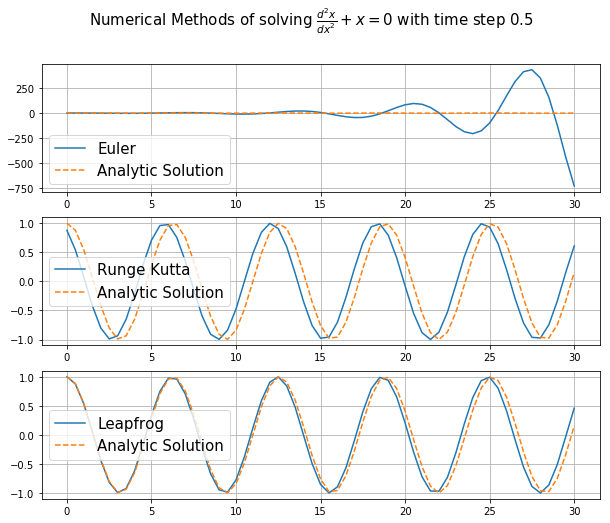

In [87]:
fig,ax = plt.subplots(3,1)
fig.set_size_inches(10,8)
ti,tf,dt = 0,30.5,0.5
t = np.arange(ti,tf,dt)
analytic_soln = np.cos(t)
plt.suptitle(r'Numerical Methods of solving $\frac{d^2x}{dx^2}+x = 0$ with time step '+str(dt), fontsize=15)
ax[0].plot(t,euler_method(f_t=lambda x,t:0,ti=ti,tf=tf,dt=dt)[0],label='Euler')
ax[1].plot(t,runge_kutta(function=f_2,t0=ti,tf=tf,dt=dt),label='Runge Kutta')
ax[2].plot(t,leapfrog(F=lambda x: -x,ti=ti,tf=tf,h=dt)[0],label='Leapfrog')
for i in ax:
    i.grid()
    i.plot(t,analytic_soln,'--', label='Analytic Solution')
    i.legend(loc='best', fontsize = 15);

## PART A

In [49]:
# euler_method(f_t=lambda x,t:0,dt=dt)[0]
# runge_kutta(function=f_2,dt=dt)
# leapfrog(F=lambda x: -x,h=dt)[0]
dt_array = np.array([1,0.3,0.1,0.03,0.03,0.01])
ti=0
tf=30
mydict = {"Euler":[],"RK":[],"LF":[]}
for dt in dt_array:
    a=euler_method(f_t=lambda x,t:0,dt=dt,ti=ti,tf=tf)[0][-1]
    b=runge_kutta(function=f_2,dt=dt,t0=ti,tf=tf)[-1]
    c=leapfrog(F=lambda x: -x,h=dt,ti=ti,tf=tf)[0][-1]
    mydict['Euler'].append(a)
    mydict['RK'].append(b)
    mydict['LF'].append(c)

In [88]:
mydict["Time_steps"]=list(dt_array)
mydict["Analytic"] = list(np.ones_like(dt_array)*np.cos(30))
table=pd.DataFrame(mydict).set_index('Time_steps')
table

,Analytic,Euler,LF,RK
Time_steps,,,,
1.00,0.154251,-16384.000000,0.500000,0.164579
0.30,0.154251,-59.578539,-0.032606,0.154259
0.10,0.154251,-0.195595,0.067291,0.154251
0.03,0.154251,0.181217,0.125661,0.154251
0.03,0.154251,0.181217,0.125661,0.154251
0.01,0.154251,0.166568,0.144487,0.154251


The Euler solution is fairly good at small time steps (dt=0.01). But as the step size increases the approximation gets exponentially worse. This is probably due to the effects of higher order that this algorithm does not take into effect.

The Leap frog solution is very good. The reason the numbers aren't the same as RK is that I'm not getting exactly the values at time at 30. Only the last one in the array. If you look at the plot, LF is closer to the analytic solution than RK.

The RK solution gets to the analytic solution by step size 0.1. Afterwards it remains stable.

## Part B

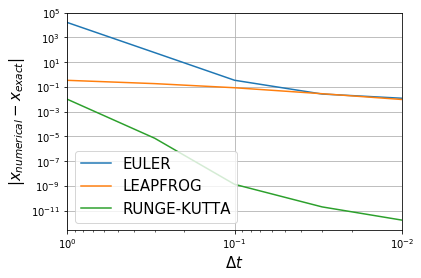

In [105]:
plt.loglog(table.index,np.abs(table.Euler-table.Analytic), label='EULER')
plt.loglog(table.index,np.abs(table.LF-table.Analytic),label='LEAPFROG')
plt.loglog(table.index,np.abs(table.RK-table.Analytic),label='RUNGE-KUTTA')
plt.grid()
plt.xlim(1e0,1e-2)
plt.xlabel(r'$\Delta t$', fontsize = 15)
plt.ylabel(r'$|x_{numerical} - x_{exact}|$', fontsize = 15)
plt.legend(loc='best', fontsize = 15);

# Part 3.a

### $ \phi = -\frac{1}{\sqrt{1+x^2+y^2}}$

### $ \frac{d^2x}{dt^2} = -\frac{1}{(1+x^2+y^2)^{3/2}}$ 

### $ \frac{d^2y}{dt^2} = -\frac{1}{(1+x^2+y^2)^{3/2}}$ 

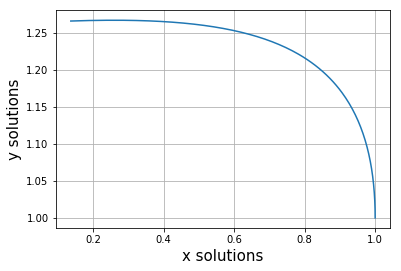

In [130]:
def cubed_potential(x,y):
    phi = -1/(1+x**2+y**2)**(3/2)
    return phi
x0=1
y0=0
xprime = 0
yprime = 0.3
# F,h=0.5,x0=1,v0=0,ti=0,tf=30
xvals = leapfrog(F=lambda x: cubed_potential(x=x,y=y0),ti=0,tf=100,h=0.01,v0=xprime)[0]
yvals = leapfrog(F=lambda y: cubed_potential(x=x0,y=y),ti=0,tf=100,h=0.01,v0=yprime)[0]
plt.grid()
plt.xlabel('x solutions',fontsize = 15)
plt.ylabel('y solutions',fontsize = 15)
plt.plot(xvals,yvals);

# Part 3.b

## $E = \frac{x'^2+y'^2}{2}+\Phi(x,y)$

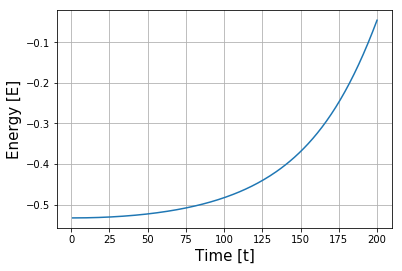

In [141]:
def potential(x,y):
    phi = -1/(1+x**2+y**2)**(1/2)
    return phi
def energy(x,y,xprime,yprime):
    return (xprime**2+yprime**2)/2 + potential(x,y)
xvals = leapfrog(F=lambda x: cubed_potential(x=x,y=y0),ti=0,tf=100,h=0.01,v0=xprime)[0]
yvals = leapfrog(F=lambda y: cubed_potential(x=x0,y=y),ti=0,tf=100,h=0.01,v0=yprime)[0]
xprimevals = leapfrog(F=lambda x: cubed_potential(x=x,y=y0),ti=0,tf=100,h=0.01,v0=xprime)[1]
yprimevals = leapfrog(F=lambda y: cubed_potential(x=x0,y=y),ti=0,tf=100,h=0.01,v0=yprime)[1]
t = np.cumsum(np.ones_like(xvals))
plt.grid()
plt.xlabel("Time [t]", fontsize = 15)
plt.ylabel("Energy [E]", fontsize = 15)
plt.plot(t,energy(xvals,yvals,xprimevals,yprimevals));